# Titanic Dataset Exploration

### Introduction
The Titanic known to be the world's largest cargo ship, sunk during its maiden voyage April 15, 1912 after colliding with an iceberg. It was unfornate that there weren't enough lifeboats for everyone onboard. This analzysis explores the historical dataset and answer important questions.

The following columns are present in the dataset
 
 - Survived     survival      (0 = No, 1 = Yes)
 - Pclass       Ticket class  (1 = 1st, 2 = 2nd, 3 = 3rd)  
 - Name         Name of passenger   
 - Sex          sex
 - Age          Age in years
 - SibSp        Number of siblings / spouses aboard the Titanic
 - Parch        Number of parents / children aboard the Titanic 
 - Ticket       Ticket number
 - Fare         Passenger fare
 - Cabin        Cabin number 
 - Embarked     Port of Embarkation (C = Cherbourg, Q = Queenstown, S=Southampton)
 

The dataset was downloaded from kaggle [https://www.kaggle.com/c/titanic/data]
I have made used of the train dataset in this write, becuase the test dataset also contain also the  same number of columns asides the __`Survived`__ column

In [49]:
#Import pandas Python data analysis and manipulation library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# The first part of the dataset
df = pd.read_csv("train.csv")

In [60]:
# Viewing the first five rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
# Checked the numbers of rows and column in the dataset
# has a total of 1,309
df.shape

(891, 12)

In [64]:
# displaying the general information about the dataset
# The dataset have five interger data type, two floating data types and five object
# or string data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [63]:
# Checking the missing values
# The first part of the missing values on the Age, cabin and Embarked columns
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

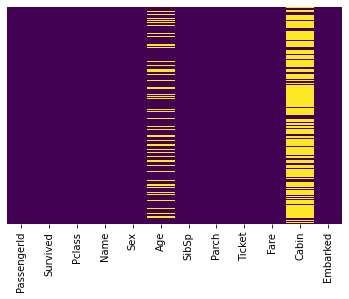

In [62]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis");

## Data Cleaning

In [65]:
# Checking the perentage of missing values in the dataset
# about 20% of missing values in the Age column, so i will fill this with 
# the mean of the column
df.Age.isnull().sum() / len(train_data.Age) * 100

19.865319865319865

In [66]:
# about 77% of missing values in the Cabin column, so i will drop the column
df.Cabin.isnull().sum() / len(df.Cabin) * 100

77.10437710437711

In [67]:
# about 0.2% of missing values in the Embarked column, so i will fill the the mode
df.Embarked.isnull().sum() / len(df.Embarked) * 100

0.22446689113355783

In [71]:
df.Age.fillna(df.Age.mean(), inplace=True)

In [72]:
df.drop("Cabin", axis=1, inplace=True)

In [73]:
df.Embarked.fillna(df.Embarked.mode()[0], inplace=True)

In [74]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [28]:
# Removing the not too useful column
df.drop("PassengerId", axis=True, inplace=True)

In [75]:
df[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


### Data Exploration

In [76]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
# The stastistical table above shows that the average age of passenger on the 
# ship was 29 age and the oldest was about 80 years old.

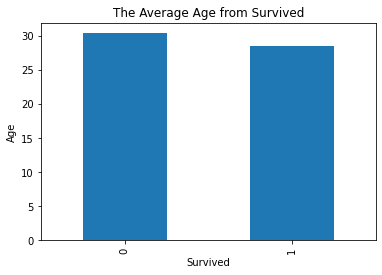

In [92]:
plt.title("The Average Age from Survived")
plt.ylabel("Age")
df.groupby("Survived")["Age"].mean().plot(kind="bar");

In [79]:
round(train_data.groupby("Survived")["Age"].mean())

Survived
0    31.0
1    28.0
Name: Age, dtype: float64

In [ ]:
# The plot shows that the average age of of those that survived is 28 and those 
# that did not survived is 31, we can conclude that younger people survived the accident more  

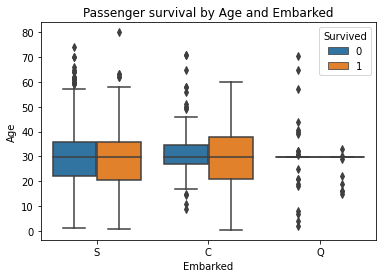

In [95]:
plt.title("Passenger survival by Age and Embarked")
sns.boxplot(x="Embarked", y="Age", data=df, hue="Survived");

In [ ]:
#C = Cherbourg, Q = Queenstown, S=Southampton)
# The boxplot above shows that passengers that border from southhampton had
# equal numbers of survived and nor survived passengers, while the number
# of passengers from Cherbourg that survived are more than the not survived.
# Queens had the least number of both survived and not survived  

In [94]:
df.query("SibSp > 0 & Parch > 0")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.000000,1,1,PP 9549,16.7000,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.000000,1,5,347082,31.2750,S
16,17,0,3,"Rice, Master. Eugene",male,2.000000,4,1,382652,29.1250,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.000000,3,1,349909,21.0750,S
...,...,...,...,...,...,...,...,...,...,...,...
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.000000,1,1,36928,164.8667,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.000000,1,1,347742,11.1333,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.000000,1,1,11751,52.5542,S


In [ ]:
# The query above shows that 142 passengers from the dataset had either siblings
# /spouses or parent/children onboard

In [90]:
df.query("Embarked == 'Q' & Survived == 0").shape

(47, 11)

## Conclusion
This project shows a simple data analysis process from the infamous titanic dataset and has the following results.
It concluded form the this analysis that the younger passengers survived more than the he older passengers, and passenngers from Southampton and Cherbourg had higher numbers of survivals than Queentown.

#### Next step
Further transformation can be applied to this dataset to make it ready for a machine learning modelling process.
#### Reference
Kaggle.com